This project is text processing project 


so we have imdb datset with review and based on that review we have to predict wheteher the review is positive or negative 

so we have to convert entire text into some kind of vectors by using NLP 

and we can convert sentiments into dummy like 0 and 1 formate 

then we can simply apply any classification model 

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [5]:
data=pd.read_csv('IMDB Dataset.csv')

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
from bs4 import BeautifulSoup
import re

In [7]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

Sow e are using beautifulsoup here , we can use any other parser 

we have used html parser , this will read the in HTML form 

so we are removing all the brackets from our texts 

after removing that we will be removing all the noisy text 

then we will apply that particular function on that data 

In [8]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

then we have removed the special chracter from our data 

In [9]:
from sklearn.preprocessing import LabelBinarizer

lablebinarizer will create labels for us 

In [10]:
lb=LabelBinarizer()
data['sentiment']=lb.fit_transform(data['sentiment'])

In [11]:
train_sentiment=data.sentiment[:40000]
train_review=data.review[:40000]
test_sentiment=data.sentiment[40000:]
test_review=data.review[40000:]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [13]:
tf_vec=TfidfVectorizer(min_df=20,max_df=0.5,ngram_range=(1,2))

In [14]:
cv_train_review=tf_vec.fit_transform(train_review)
cv_test_review=tf_vec.transform(test_review)

In [15]:
#print(tf_vec.get_feature_names())

In [16]:
cv_train_review.shape,cv_test_review.shape

((40000, 60356), (10000, 60356))

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr=LogisticRegression()

In [19]:
model=lr.fit(cv_train_review,train_sentiment)

In [20]:
model.score(cv_train_review,train_sentiment)

0.9455

In [21]:
model.score(cv_test_review,test_sentiment)

0.9032

In [22]:
pred=model.predict(cv_test_review)

In [23]:
act=test_sentiment

In [24]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

In [25]:
confusion_matrix(act,pred)

array([[4480,  513],
       [ 455, 4552]])

In [26]:
accuracy_score(act,pred)

0.9032

In [27]:
print(classification_report(act,pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4993
           1       0.90      0.91      0.90      5007

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [28]:
feature_to_coef = {
    word: coef for word, coef in zip(
        tf_vec.get_feature_names(), model.coef_[0]
    )
}
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)

('great', 8.447827648146284)
('excellent', 6.371999533134567)
('perfect', 5.101750006590076)
('wonderful', 5.088939038625109)
('the best', 4.497881922965114)


In [29]:
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)
    

('bad', -9.241921324893005)
('worst', -8.438328700768784)
('awful', -7.044490563334536)
('the worst', -6.724905388567679)
('boring', -6.346467360987173)


In [30]:
pos_words=''
for best_positive in sorted(feature_to_coef.items(), key=lambda x: x[1], reverse=True)[:100]:
    pos_words=pos_words+ str(best_positive)
    

In [31]:
neg_words=''
for best_negative in sorted(feature_to_coef.items(), key=lambda x: x[1])[:100]:
    neg_words=neg_words+ str(best_negative)

In [32]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

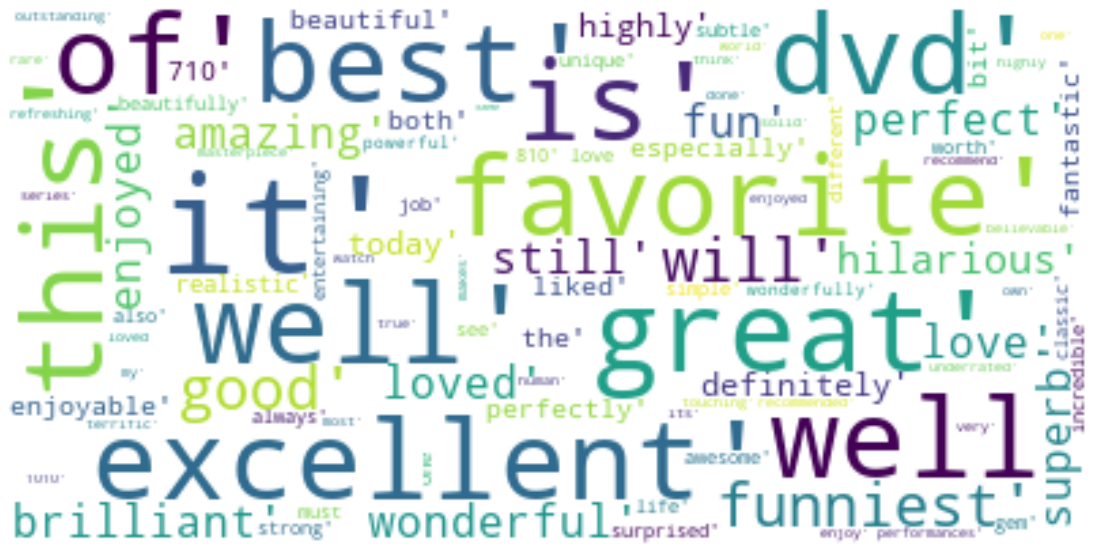

In [33]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(pos_words)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

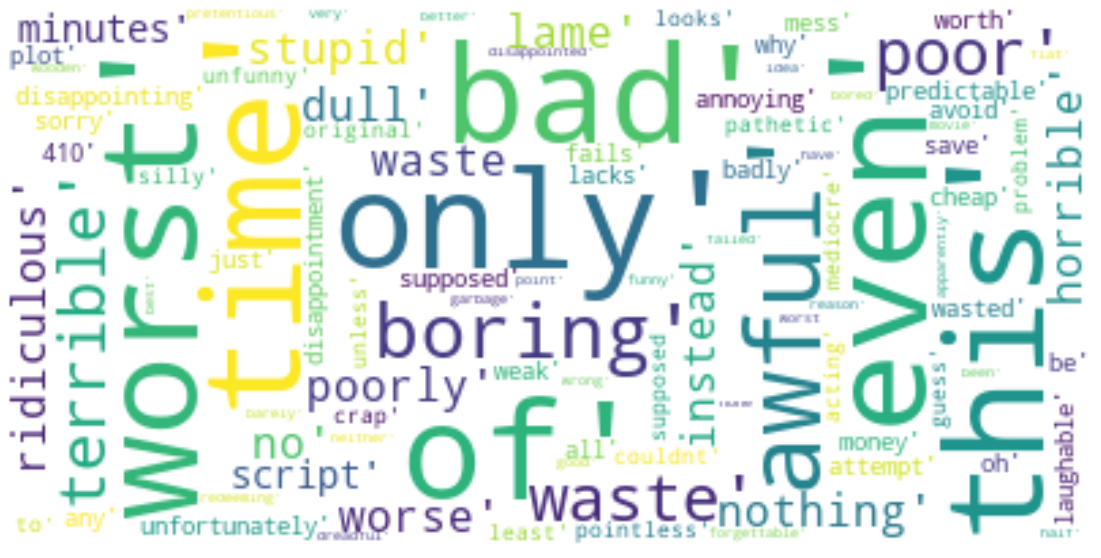

In [34]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(neg_words)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()